### Project Objective - To explore the relationship between US Dollar and Euro values

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')


In [3]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [4]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [5]:
exchange_rates.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

#### the info() method reveals the below data :

    n_rows = 5699
    n_cols = 41
    Null values are there. 
    Majority of the data types are object, which should ideally be float.

In [6]:
## Renaming columns and changing the data type of the time column

exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [7]:
exchange_rates['Time'].dtype

dtype('<M8[ns]')

In [8]:
## Isolating the Dollar column separately
euro_to_dollar = exchange_rates[['Time','US_dollar']] 

euro_to_dollar.head()

,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659


In [9]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1218     6
          ..
1.3860     1
0.8488     1
1.3858     1
0.8842     1
1.2140     1
Name: US_dollar, Length: 3528, dtype: int64

#### The exploration of the US Dollar column reveals that there is a special character '-' and data type is int. We will drop the rows with the '-' character and change the data type to float

In [10]:
dash_bool = euro_to_dollar['US_dollar'] != '-'

dash_bool.value_counts()

True     5637
False      62
Name: US_dollar, dtype: int64

In [11]:
euro_to_dollar = euro_to_dollar[dash_bool]
euro_to_dollar['US_dollar'].value_counts()

1.2276    9
1.1215    8
1.1305    7
1.1218    6
1.2713    6
         ..
0.8488    1
1.3858    1
0.8842    1
0.8866    1
1.4262    1
Name: US_dollar, Length: 3527, dtype: int64

In [12]:
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


#### Data has been cleaned, we draw a line plot for a quick visual check

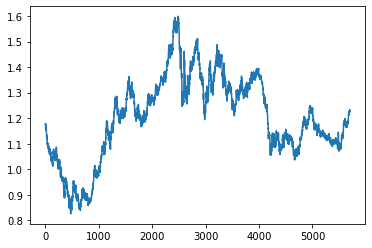

In [13]:
plt.plot(euro_to_dollar['US_dollar'])
plt.show()

#### We can observe that the data is not smooth. We smoothen it by applying rolling average within a 30 day window.

In [14]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

euro_to_dollar.head(35)

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
5,1999-01-11,1.1569,NaN
6,1999-01-12,1.1520,NaN
7,1999-01-13,1.1744,NaN
8,1999-01-14,1.1653,NaN
9,1999-01-15,1.1626,NaN


#### Presenting the change in Euro-Dollar rates during the Covid-19 Pandemic. 

In [15]:
euro_to_dollar.head()

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN


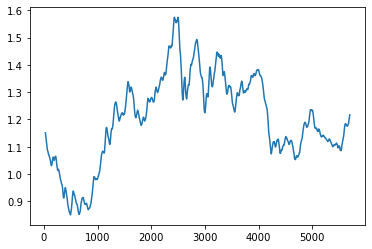

In [16]:
plt.plot(euro_to_dollar['rolling_mean'])
plt.show()

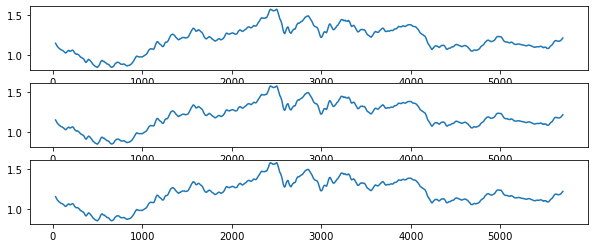

In [17]:
#Drawing three axes to represent the change during the Financial Crisis

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (10,4))

ax_list = [ax1, ax2, ax3]

for ax in ax_list:
     ax.plot(euro_to_dollar['rolling_mean'])    
    
plt.show()

In [18]:
euro_to_dollar= euro_to_dollar.reset_index()


In [19]:
euro_to_dollar.head()

,index,Time,US_dollar,rolling_mean
0,0,1999-01-04,1.1789,NaN
1,1,1999-01-05,1.1790,NaN
2,2,1999-01-06,1.1743,NaN
3,3,1999-01-07,1.1632,NaN
4,4,1999-01-08,1.1659,NaN


In [20]:
euro_to_dollar['year'] = euro_to_dollar['Time'].dt.year
euro_to_dollar.head()

,index,Time,US_dollar,rolling_mean,year
0,0,1999-01-04,1.1789,NaN,1999
1,1,1999-01-05,1.1790,NaN,1999
2,2,1999-01-06,1.1743,NaN,1999
3,3,1999-01-07,1.1632,NaN,1999
4,4,1999-01-08,1.1659,NaN,1999


In [21]:
euro_to_dollar['year'].value_counts().sort_index()

1999    259
2000    255
2001    254
2002    255
2003    255
2004    259
2005    257
2006    255
2007    255
2008    256
2009    256
2010    258
2011    257
2012    256
2013    255
2014    255
2015    256
2016    257
2017    255
2018    255
2019    255
2020    257
2021      5
Name: year, dtype: int64

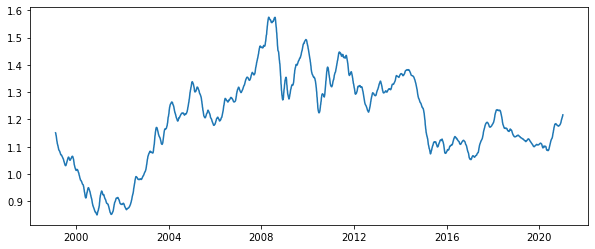

In [22]:
euro_to_dollar = euro_to_dollar.set_index(euro_to_dollar['Time'])

fig, ax = plt.subplots( figsize = (10,4))

ax.plot(euro_to_dollar['rolling_mean'])
plt.show()


In [23]:
fin_crisis_bool = (euro_to_dollar['year'] >=2007) & (euro_to_dollar['year'] <=2009)


In [24]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [31]:
euro_to_dollar.drop( 'Time', axis = 1, inplace = True )

In [33]:
euro_to_dollar.reset_index(inplace = True)
euro_to_dollar.head()

,Time,index,US_dollar,rolling_mean,year
0,1999-01-04,0,1.1789,NaN,1999
1,1999-01-05,1,1.1790,NaN,1999
2,1999-01-06,2,1.1743,NaN,1999
3,1999-01-07,3,1.1632,NaN,1999
4,1999-01-08,4,1.1659,NaN,1999


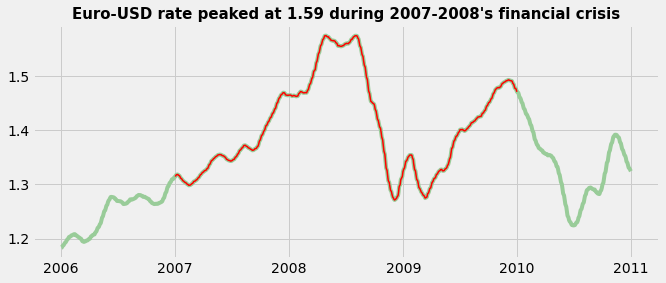

In [59]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots( figsize = (10,4))

bool_06_10 = (euro_to_dollar['year'] >=2006) & (euro_to_dollar['year'] <=2010)
fin_crisis_bool = (euro_to_dollar['year'] >=2007) & (euro_to_dollar['year'] <=2009)


ax.plot(euro_to_dollar[bool_06_10]['Time'],euro_to_dollar[bool_06_10]['rolling_mean'], color = '#99cc99')
ax.plot(euro_to_dollar[fin_crisis_bool]['Time'], euro_to_dollar[fin_crisis_bool ]['rolling_mean'], color = '#ff0000', linewidth = 1.5)

dict_font = {'fontsize': 15,
             'fontweight' : 'bold',
                 'verticalalignment': 'baseline',
             'horizontalalignment': 'center'}

ax.set_title("Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis", fontdict = dict_font)

plt.show()